In [1]:
from fastkde import fastKDE
import glob
import os
import json
import pandas as pd
import numpy as np
import math
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
yaw_path = '../../data/yaws/03082020/yaws.csv'
outfile = '../../data/density/03082020/fast_kde_density.csv'
data = pd.read_csv(yaw_path)

FileNotFoundError: [Errno 2] File ../../data/yaws/03082020/yaws.csv does not exist: '../../data/yaws/03082020/yaws.csv'

In [13]:
npdata = np.array(data)
npdata_flat = np.concatenate(npdata).ravel().tolist()
df = pd.DataFrame({'angles': npdata_flat})

In [14]:
myPDF,axes = fastKDE.pdf(np.array(df['angles']), numPoints= 2**15 + 1)

/home/hofmancl/.local/lib/python3.8/site-packages/fastkde/fastKDE.py:464: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  *(1+sqrt(1-ecfThresh/ecfSq[iCalcPhi]))
/home/hofmancl/.local/lib/python3.8/site-packages/fastkde/fastKDE.py:463: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  kappaSC[iCalcPhi] = (N/(2*(N-1)))\
/home/hofmancl/.local/lib/python3.8/site-packages/fastkde/fastKDE.py:472: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will 

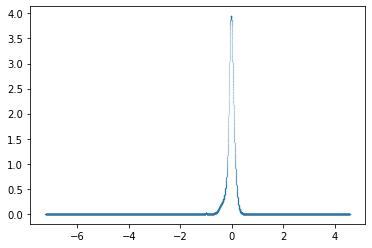

In [22]:
plt.scatter(axes, myPDF, s = 0.01, alpha = 0.5)

In [23]:
density = pd.DataFrame({'pdf': myPDF , 'axes': axes})

In [32]:
density[density['pdf'] == 0].shape

(18319, 2)

In [33]:
density.shape

(32769, 2)

In [36]:
2**15

32768

In [6]:
max(myPDF)
# maybe this estimator is better since it doesnt give back negative values

3.9429516701318796

In [8]:
density = pd.DataFrame({'pdf': myPDF , 'axes': axes})
# compute cdf
all_integrals = []
integral_before = 0
for i in tqdm(range(1,density.shape[0])):
    integral_now = integrate.trapz(density.loc[i-1:i,'pdf'] , density.loc[i-1:i, 'axes'])
    integral_now += integral_before
    integral_before = integral_now
    all_integrals.append(integral_now)
density.loc[1:,'cdf'] = all_integrals
density.loc[0,'cdf'] = 0

  0%|          | 4822/2097152 [00:02<19:53, 1753.65it/s]


KeyboardInterrupt: 

In [9]:
density = pd.DataFrame({'pdf': myPDF , 'axes': axes})

In [13]:
density.to_csv(outfile, index=False)